In [1]:
%load_ext line_profiler
%load_ext memory_profiler

In [2]:
%load_ext autoreload
%autoreload 2

In [12]:
import util
import models

from os.path import expanduser
from os import path

import matplotlib.pyplot as plt
%matplotlib inline

import yass
from yass import read_config
from yass.augment import (make_training_data,
                          save_detect_network_params,
                          save_triage_network_params,
                          save_ae_network_params,
                          train_detector,
                          train_ae,
                          train_triage)
from yass.explore import RecordingExplorer, SpikeTrainExplorer

import numpy as np
from scipy.io import loadmat

In [5]:
yass.set_config("../config/49-lab.yaml")
CONFIG = read_config()

In [8]:
path_to_data = path.expanduser('~/data')
path_to_ground_truth = path.join(path_to_data,
                                 'groundtruth_ej49_data1_set1.mat')
path_to_recordings = path.join(path_to_data, 'tmp', 'preprocess',
                               'standarized.bin')
path_to_geom = path.join(path_to_data, 'ej49_geometry1.txt')

In [11]:
# load ground truth
_ = loadmat(path_to_gold_standard)
gt = np.hstack([_['spt_gt'], _['L_gt']])

In [16]:
gt = gt[2:-1]

In [23]:
gt[:, 1] = gt[:, 1] - 1

In [24]:
re = RecordingExplorer(path_to_recordings, spike_size=15)
se = SpikeTrainExplorer(gt, re)

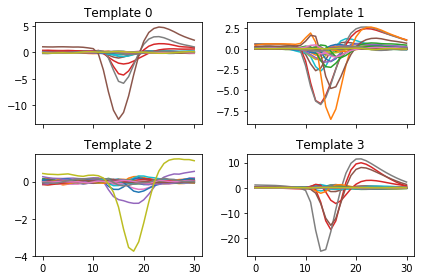

In [26]:
se.plot_templates(group_ids=[0, 1, 2, 3])